<a href="https://colab.research.google.com/github/s0ye0nyang/people-space/blob/main/shoes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
# !pip install -e ".[dev]"
import fastbook
import pandas as pd
import numpy as np
fastbook.setup_book()
# torch.cuda.is_available()

     |████████████████████████████████| 727kB 6.0MB/s 
     |████████████████████████████████| 1.2MB 9.9MB/s 
     |████████████████████████████████| 194kB 22.4MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 61kB 9.0MB/s 
Mounted at /content/gdrive


In [62]:
import pip
!pip-compile
!pip install -r requirements.txt

Traceback (most recent call last):
  File "/usr/local/bin/pip-compile", line 5, in <module>
    from piptools.scripts.compile import cli
  File "/usr/local/lib/python2.7/dist-packages/piptools/scripts/compile.py", line 11, in <module>
    from .._compat import install_req_from_line, parse_requirements
  File "/usr/local/lib/python2.7/dist-packages/piptools/_compat/__init__.py", line 7, in <module>
    from .pip_compat import (
  File "/usr/local/lib/python2.7/dist-packages/piptools/_compat/pip_compat.py", line 35, in <module>
    is_file_url = do_import("download", "is_file_url")
  File "/usr/local/lib/python2.7/dist-packages/piptools/_compat/pip_compat.py", line 24, in do_import
    return getattr(imported, package)
AttributeError: 'module' object has no attribute 'is_file_url'
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [37]:
from fastbook import *
# from fastai.vision.widgets import *
from fastai.vision import *
from fastai.vision.widgets import *
from pandas import DataFrame
from PIL import Image, ImageOps


In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
# key = os.environ.get('AZURE_SEARCH_KEY', '2534e2ad7fb24dc4be8e38d7b3763a24')
# search_images_bing

# results = search_images_bing(key, 'shoes')
# ims = results.attrgot('content_url')
# len(ims)

# bear_types = 'nike','adidas','reebok'
# path = Path('bears')
# if not path.exists():
#     path.mkdir()
#     for o in bear_types:
#         dest = (path/o)
#         dest.mkdir(exist_ok=True)
#         results = search_images_bing(key, f'{o} bear')
#         download_images(dest, urls=results.attrgot('contentUrl'))

# fns = get_image_files(path)


In [5]:
# new_img =[]
# # creating an og_image object
# i=0
# for c in classes:
#     n = get_image_files(Path(root+'/'+c))
#     for name in n:
#       _image = Image.open(name)    
#       # print(str(name).split('/')[-1])
#       # applying grayscale method
#       gray_image = ImageOps.grayscale(_image)
#       gray_image.save(gpath[i]+'/'+str(name).split('/')[-1])
#     i+=1

In [6]:
root = '/content/gdrive/MyDrive/Data/dataset'
classes = ['nike','adidas','reebok']
path = [root+'/'+c for c in classes]
# gpath = [root+'/'+c+'-g' for c in classes]


In [7]:
df = DataFrame([],columns=['name','label'])
for i in range(len(classes)):
  newdf= DataFrame({
      'name':get_image_files(path[i]),
      'label':classes[i]
  })
  df = df.append(newdf)

display(df)

,name,label
0,/content/gdrive/MyDrive/Data/dataset/nike/0a14c686-eawzstfumaezit8.jpg,nike
1,/content/gdrive/MyDrive/Data/dataset/nike/123992.jpg,nike
2,/content/gdrive/MyDrive/Data/dataset/nike/12959912_13502989_600.jpg,nike
3,/content/gdrive/MyDrive/Data/dataset/nike/12959137_13486346_600.jpg,nike
4,/content/gdrive/MyDrive/Data/dataset/nike/13157995_27458924_600.jpg,nike
...,...,...
933,/content/gdrive/MyDrive/Data/dataset/reebok/unnamed (7).jpg,reebok
934,/content/gdrive/MyDrive/Data/dataset/reebok/unnamed (8).jpg,reebok
935,/content/gdrive/MyDrive/Data/dataset/reebok/unnamed (9).jpg,reebok
936,/content/gdrive/MyDrive/Data/dataset/reebok/WOMEN_RUNNING_SHOES_EG9015_1.jpg,reebok


In [8]:
np.random.seed(2)

In [9]:
tfms_tfms = aug_transforms(do_flip = False, flip_vert = False, mult=1.2,max_rotate=10,max_zoom=0.1,
                           pad_mode=PadMode.Border, p_lighting = 1)

In [10]:
data = ImageDataLoaders.from_df(df,'/',item_tfms=Resize(128), batch_tfms=tfms_tfms, bs = 30, num_workers = 1)

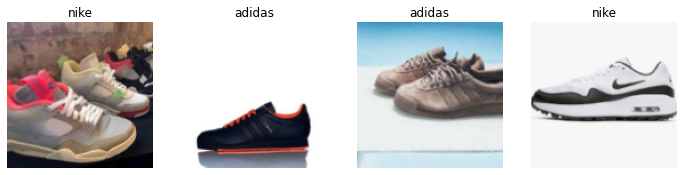

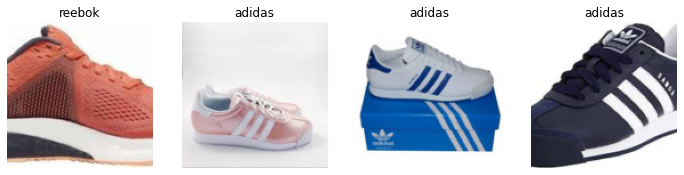

In [13]:
data.train.show_batch(max_n=4, nrows=1)
data.valid.show_batch(max_n=4, nrows=1)

SuggestedLRs(lr_min=0.0013182567432522773, lr_steep=1.5848931980144698e-06)

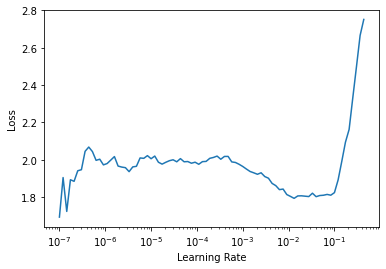

In [14]:
learn = cnn_learner(data, resnet34, metrics=error_rate)
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time
0,1.512863,1.066021,0.364299,02:18


epoch,train_loss,valid_loss,error_rate,time
0,0.993319,0.709547,0.244080,00:25
1,0.750872,0.571845,0.194900,00:26
2,0.467456,0.517862,0.153005,00:25
3,0.326443,0.494935,0.149362,00:25


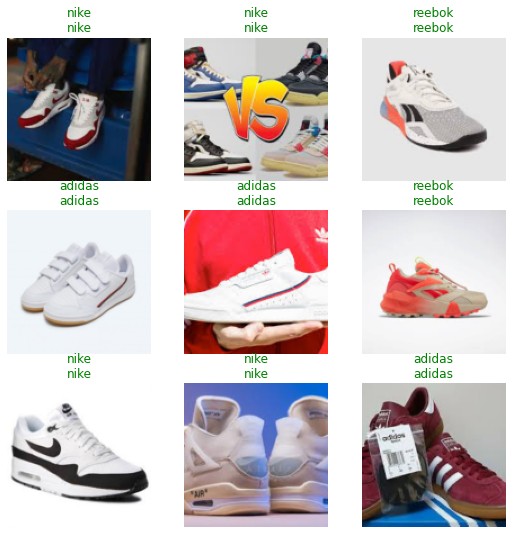

In [15]:
learn.fine_tune(4)
learn.show_results()

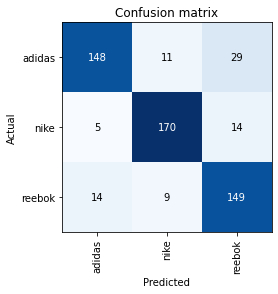

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

              precision    recall  f1-score   support

      adidas       0.89      0.79      0.83       188
        nike       0.89      0.90      0.90       189
      reebok       0.78      0.87      0.82       172

    accuracy                           0.85       549
   macro avg       0.85      0.85      0.85       549
weighted avg       0.85      0.85      0.85       549



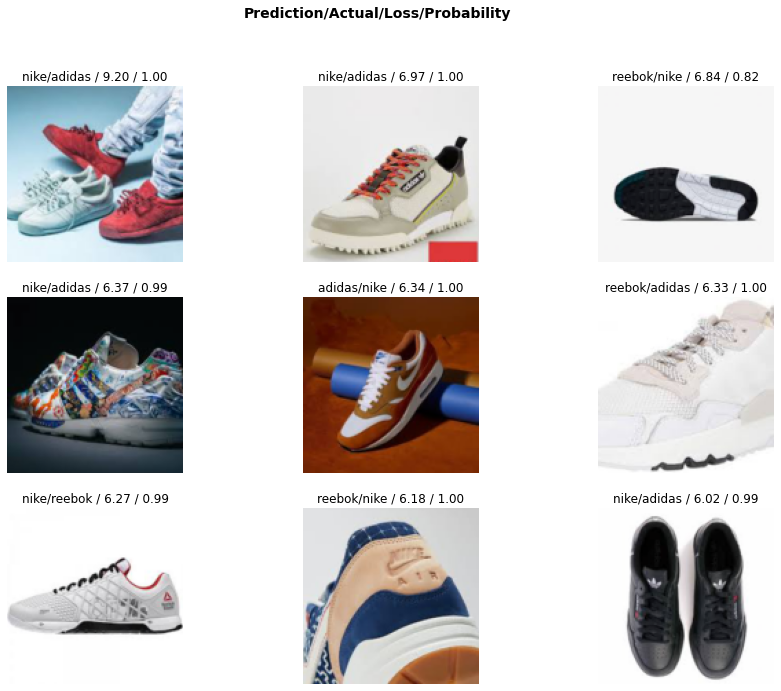

In [17]:
# interp.most_confused(min_val=2)
interp.plot_top_losses(9, figsize=(15,11))
interp.print_classification_report()


In [40]:
cleaner = ImageClassifierCleaner(learn)
cleaner

#hide
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [41]:
learn.export()

In [43]:
Path('/').ls(file_exts='.pkl')

(#1) [Path('/export.pkl')]

In [44]:
learn_inf = load_learner('/export.pkl')

In [26]:
learn_inf.predict('/content/gdrive/MyDrive/Data/dataset/reebok/unnamed (7).jpg')

('reebok', tensor(2), tensor([0.0104, 0.0029, 0.9867]))

In [56]:
btn_upload = widgets.FileUpload()
# btn_upload = SimpleNamespace(data = ['/content/gdrive/MyDrive/Data/dataset/reebok/unnamed (7).jpg'])

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [50]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [51]:
pred, pred_idx,probs = learn_inf.predict(img)
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: reebok; Probability: 0.9867')

In [52]:
btn_run = widgets.Button(description='Classify')

In [53]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [35]:
lbl_pred = widgets.Label()

In [57]:
#hide_output
VBox([widgets.Label('Select your shoes!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [59]:
#hide
!pip install voila
!jupyter serverextension enable --sys-prefix voila 

     |████████████████████████████████| 1.9MB 6.3MB/s 
     |████████████████████████████████| 194kB 41.0MB/s 
     |████████████████████████████████| 112kB 21.4MB/s 
     |████████████████████████████████| 552kB 21.9MB/s 
     |████████████████████████████████| 430kB 16.9MB/s 
     |████████████████████████████████| 71kB 7.2MB/s 
     |████████████████████████████████| 102kB 10.5MB/s 
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7667 sha256=822bbab5eb9cb8f9d4c3b130c4d29adf855298613a71f277393b171fdf6dff8f
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built contextvars
ERROR: nbdev 1.1.12 has requirement nbconvert<6, but you'll have nbconvert 6.0.7 which is incompatible.
ERROR: google-colab 1.0.0 has requirement tornado~=5.1.0; python_version >= "3.0", but you'll have tornado 6.1 which is incompatible.
  Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:


Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
